In [1]:
# !pip install -U d2l
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

dataset：50 train_pair & 50 test_pair
y=2sin(x)+x^0.8+ε
ε ~ N(0,0.5^2)

In [ ]:
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 训练样本的输入

def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本

In [4]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

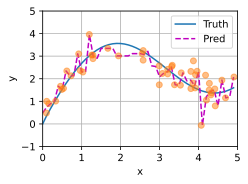

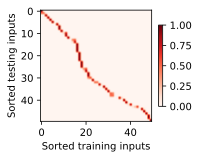

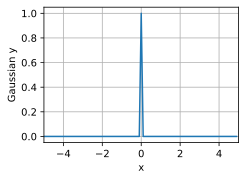

In [5]:
X_repeat = x_test.repeat_interleave(n_train).reshape((n_train, n_train))
# X_repeat 的形状: (n_test, n_train),每一行都包含着相同的测试输入（query）
# x_train 是key。
w=100 #w=1/σ，是bandwidth的倒数
attention_weights = nn.functional.softmax(-(w*(X_repeat - x_train))**2 / 2, dim=1) #row-wise softmax
# attention_weights 的形状：(n_test, n_train),每一行都包含着要在给定的每个value（ y_train ）之间分配的注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

#attention可视化
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')
plt.show()

#绘制高斯曲线
def normal_distribution(x, w):
    return d2l.np.exp(-1*((w*x)**2) / 2)
x = torch.arange(-5, 5, 0.1)
y = normal_distribution(x, w)
d2l.plot(x, y, 'x', 'Gaussian y')
plt.xlim(-5, 5)
plt.show()

If we increase w=1/σ(reducing the kernel bandwidth), the band will get narrower, but the model will start to overfit.